In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/sample_data/mnist_test.csv')
print(data.head())
data=np.array(data)
np.random.shuffle(data)
train_set=data[:33600,]
print(train_set.shape)
test_set=data[33600:,]
print(test_set.shape)


   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(9999, 785)
(0, 785)


In [4]:
def one_hot(Y):                                   #one hot coding for labels
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

x_train=train_set[:,1:].T
print(x_train.shape)
x_train = x_train / 255.0

y_train=train_set[:,:1].T
y_coded=one_hot(y_train)
print(y_coded[:,60])
print(y_train[:,60])
m=33600

(784, 9999)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4]


In [5]:
y_coded.shape

(10, 9999)

In [6]:
def init_parameters():
    w1=np.random.randn(10, 784) * np.sqrt(2 / 784)
    b1=np.random.rand(10,1)-0.5
    w2=np.random.randn(10, 10) * np.sqrt(2 / 10)
    b2=np.random.rand(10,1)-0.5
    w3=np.random.randn(10, 10) * np.sqrt(2 /10)
    b3=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2,w3,b3

def reLU(z):
    return np.maximum(z,0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # prevent overflow
    return expZ / np.sum(expZ, axis=0, keepdims=True)



def get_prediction(y_hat):
    return np.argmax(y_hat,axis=0)

def forward_prop(w1,b1,w2,b2,w3,b3,X):
    z1=w1.dot(X)+b1
    a1=reLU(z1)
    z2=w2.dot(a1)+b2
    a2=reLU(z2)
    z3=w3.dot(a2)+b3
    y_hat=softmax(z3)
    return z1,a1,z2,a2,z3,y_hat

def reLU_diff(z):
    return z>0

def back_prop(w1,b1,w2,b2,w3,b3,z1,z2,z3,a1,a2,y_hat,X,Y):
    m=X.shape[1]
    dz3=y_hat-Y
    dw3=(1/m)*(dz3.dot(a2.T))
    db3=(1/m)*(np.sum(dz3,axis=1).reshape(-1,1))

    dz2=(w3.T).dot(dz3)*(reLU_diff(z2))
    dw2=(1/m)*(dz2.dot(a1.T))
    db2=(1/m)*(np.sum(dz2,axis=1).reshape(-1,1))

    dz1=(w2.T).dot(dz2)*(reLU_diff(z1))
    dw1=(1/m)*(dz1.dot(X.T))
    db1=(1/m)*(np.sum(dz1,axis=1).reshape(-1,1))

    return dw3,db3,dw2,db2,dw1,db1

def update(w1,b1,w2,b2,w3,b3,dw3,db3,dw2,db2,dw1,db1,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1

    w2=w2-alpha*dw2
    b2=b2-alpha*db2

    w3=w3-alpha*dw3
    b3=b3-alpha*db3

    return w1,b1,w2,b2,w3,b3

def get_accuracy(pred,y):
    return np.sum(pred==y)/y.size
iter=[]
acc=[]
def gradient_descent(x,y,alpha,epochs):
    y_coded = one_hot(y.flatten())

    w1,b1,w2,b2,w3,b3=init_parameters()
    for i in range(epochs):
        z1,a1,z2,a2,z3,y_hat=forward_prop(w1,b1,w2,b2,w3,b3,x)
        dw3,db3,dw2,db2,dw1,db1=back_prop(w1,b1,w2,b2,w3,b3,z1,z2,z3,a1,a2,y_hat,x,y_coded)
        w1,b1,w2,b2,w3,b3=update(w1,b1,w2,b2,w3,b3,dw3,db3,dw2,db2,dw1,db1,alpha)
        if(i%20==0):
            print("Iteration no : ",i)
            iter.append(i)
            pred=get_prediction(y_hat)
            accuracy=get_accuracy(pred,y.flatten())*100
            acc.append(accuracy)
            print("accuracy : ",accuracy)

    return w1,b1,w2,b2,w3,b3




In [7]:
w1,b1,w2,b2,w3,b3=gradient_descent(x_train,y_train,0.05,2000)

Iteration no :  0
accuracy :  5.26052605260526
Iteration no :  20
accuracy :  17.25172517251725
Iteration no :  40
accuracy :  25.1025102510251
Iteration no :  60
accuracy :  33.813381338133816
Iteration no :  80
accuracy :  45.25452545254525
Iteration no :  100
accuracy :  53.24532453245324
Iteration no :  120
accuracy :  58.745874587458744
Iteration no :  140
accuracy :  62.72627262726272
Iteration no :  160
accuracy :  66.08660866086609
Iteration no :  180
accuracy :  68.68686868686868
Iteration no :  200
accuracy :  70.55705570557056
Iteration no :  220
accuracy :  72.54725472547254
Iteration no :  240
accuracy :  74.95749574957496
Iteration no :  260
accuracy :  76.85768576857686
Iteration no :  280
accuracy :  78.18781878187819
Iteration no :  300
accuracy :  79.44794479447945
Iteration no :  320
accuracy :  80.55805580558055
Iteration no :  340
accuracy :  81.27812781278128
Iteration no :  360
accuracy :  82.03820382038204
Iteration no :  380
accuracy :  82.72827282728272
Iterat

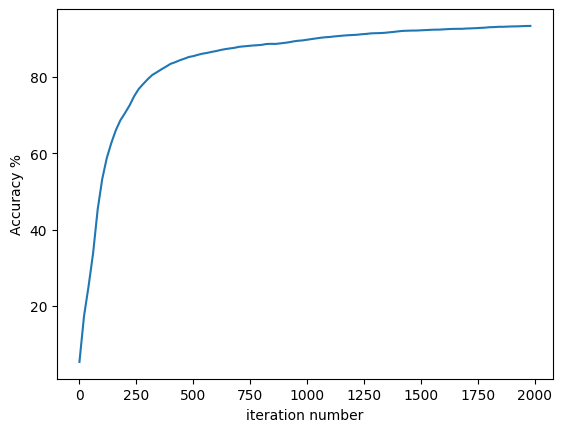

In [8]:
plt.plot(iter,acc)
plt.xlabel("iteration number")
plt.ylabel("Accuracy %")
plt.show()

In [ ]:
x_test = test_set[:,1:].T / 255.0
y_test = test_set[:, :1].T
z1,a1,z2,a2,z3,y_hat = forward_prop(w1,b1,w2,b2,w3,b3,x_test)
pred_test = get_prediction(y_hat)
acc_test = get_accuracy(pred_test, y_test)
print("Test accuracy:", acc_test * 100)


Test accuracy: 92.46428571428571


In [ ]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
x_test = np.array(test_data).T / 255.0  # Transpose and normalize
*_, y_hat_test = forward_prop(w1, b1, w2, b2, w3, b3, x_test)
predictions = np.array(get_prediction(y_hat_test))


submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions) + 1),
    "Label": predictions
})


submission.to_csv("submission.csv", index=False)